# Extended Data Figure 9: CEBRA produces consistent, highly decodable embeddings

#### import plot and data loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

In [2]:
data = pd.read_hdf("../data/EDFigure9.h5", key="data")

### Additional 4 sessions with the most neurons in the Allen visual dataset calcium recording shown for all algorithms we benchmarked

- For CEBRA-Behavior and \cebra-Time, we used temperature 1, time offset 10, batch size 128 and 10k training steps. For UMAP, we used cosine metric and $n\_neighbors$ 15 and $min\_dist$ 0.1. For tSNE, we used cosine metric and $perplexity$ 30. For conv-pi-VAE, we trained with 600 epochs, batch size 200 and learning rate $5\times 10^{-4}$. All methods used 10 time bins input. CEBRA was trained with 3D latent and all other methods were obtained with 2D latent dimension.

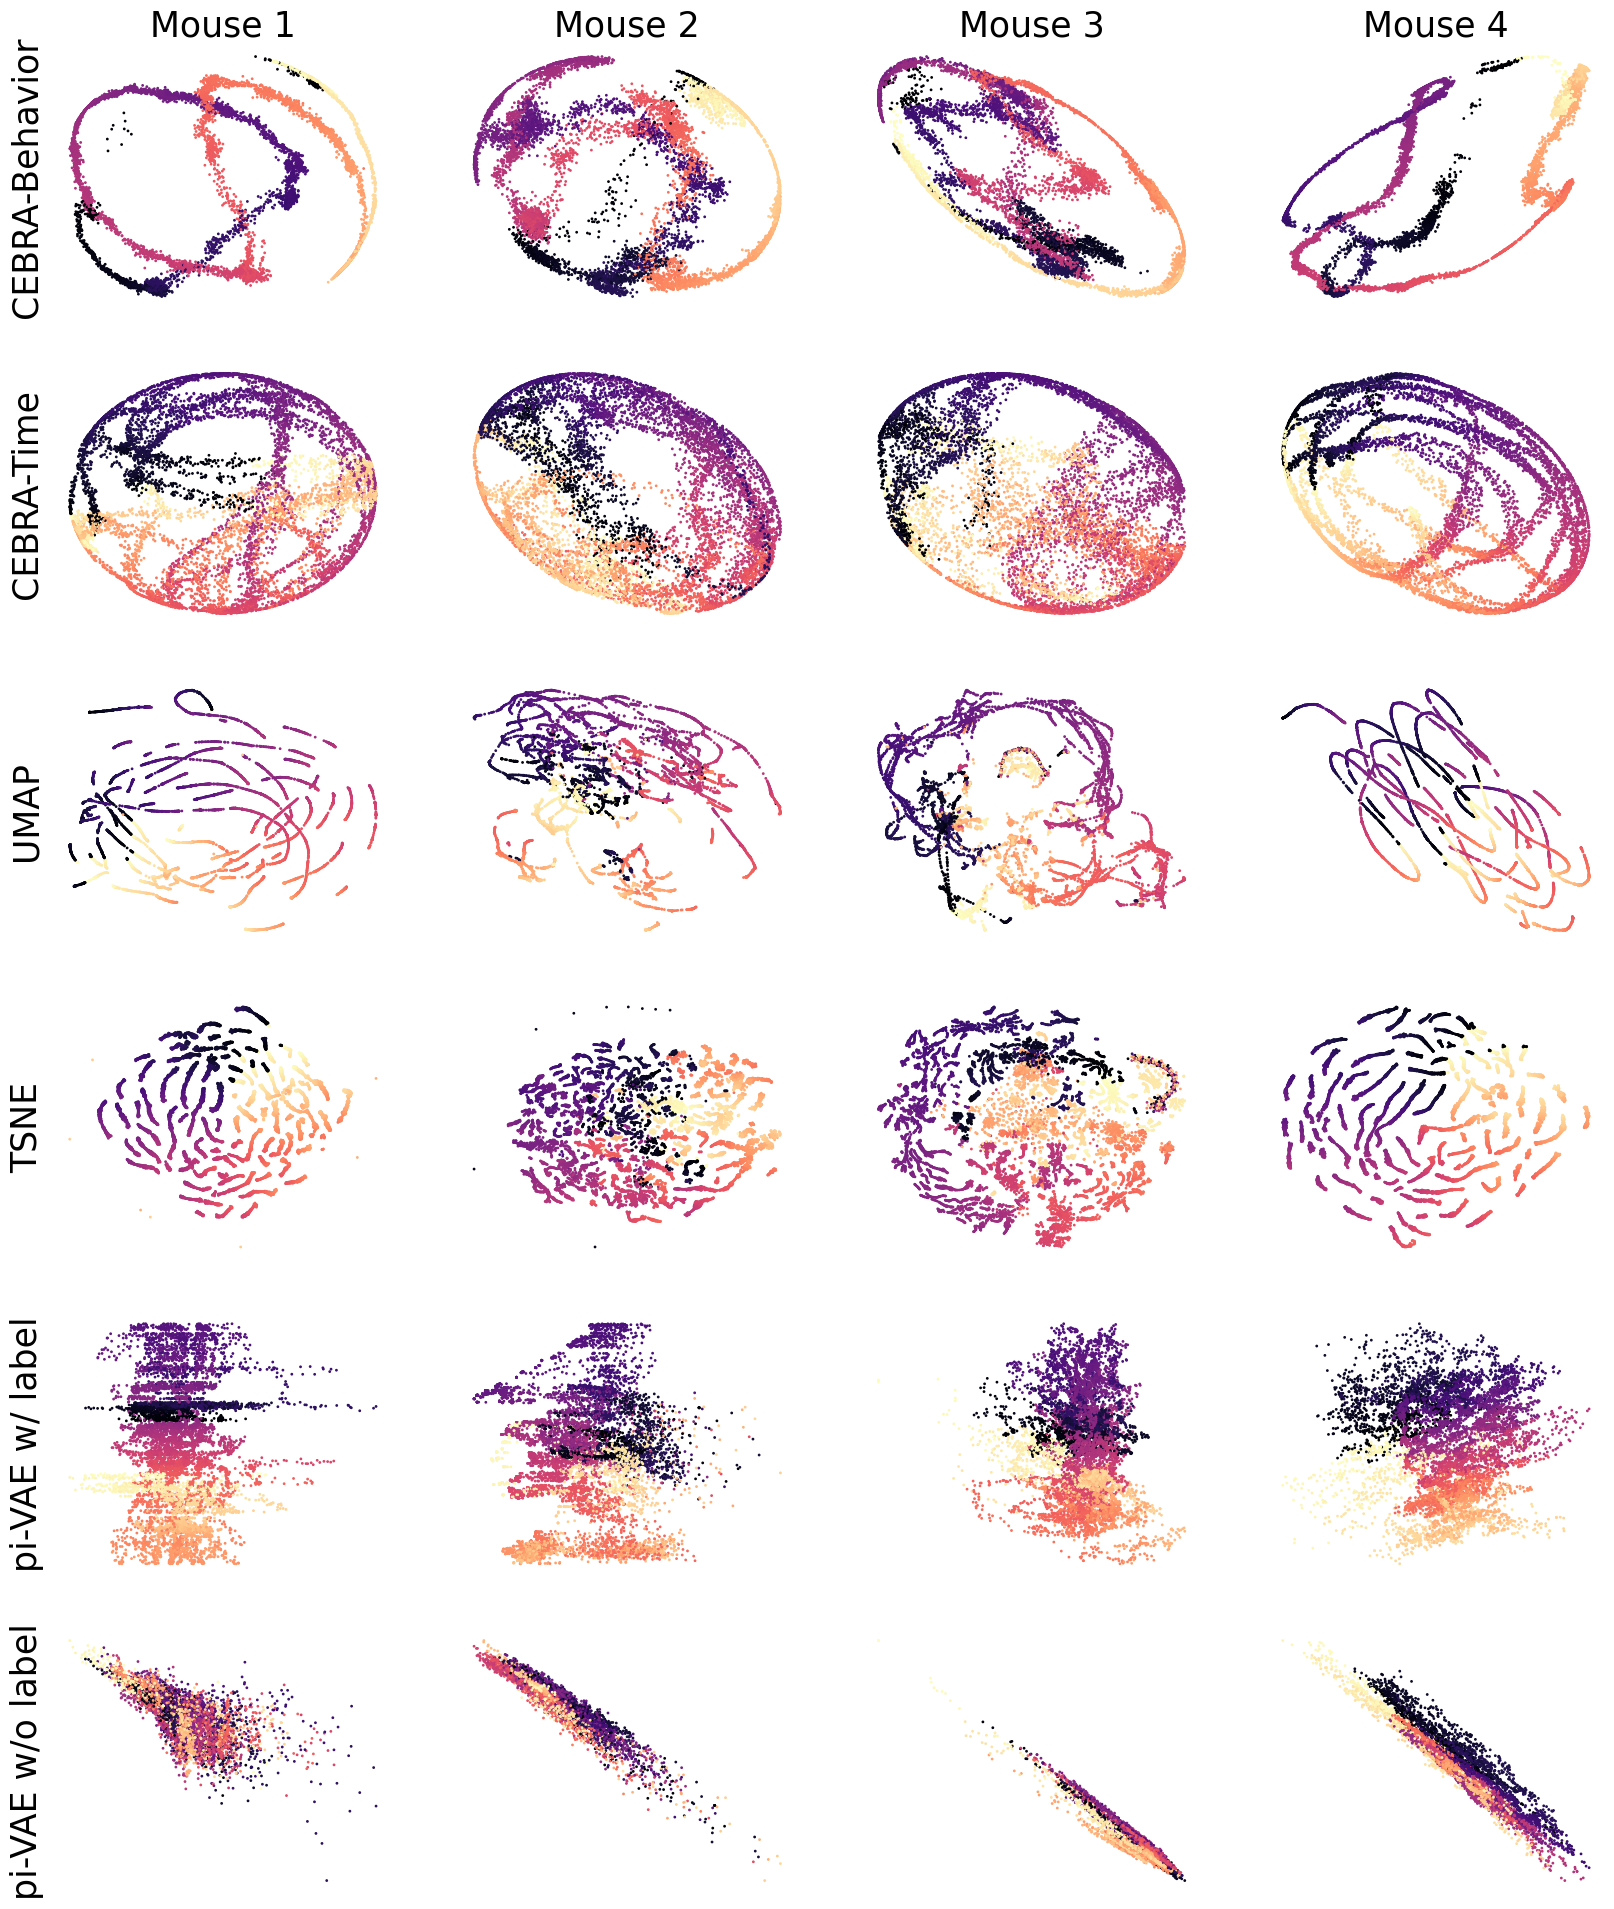

In [3]:
fig = plt.figure(figsize=(20, 24))
emissions_list = [
    data["cebra"],
    data["emission_cebra_time"],
    data["emission_umap"],
    data["emission_tsne"],
    data["emission_pivae_w"],
    data["emission_pivae_wo"],
]
for i in range(4):
    for j in range(6):

        ax = fig.add_subplot(6, 4, j * 4 + i + 1)
        idx1, idx2 = (0, 1)
        lin = sklearn.linear_model.LinearRegression()
        lin.fit(emissions_list[j][i], emissions_list[j][0])
        fitted = lin.predict(emissions_list[j][i])

        ax.scatter(
            fitted[:, idx1],
            fitted[:, idx2],
            c=np.tile(np.arange(900), 10),
            cmap="magma",
            s=1,
        )
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            plt.title(["Mouse 1", "Mouse 2", "Mouse 3", "Mouse 4"][i], fontsize=25)
        if i == 0:
            plt.ylabel(
                [
                    "CEBRA-Behavior",
                    "CEBRA-Time",
                    "UMAP",
                    "TSNE",
                    "pi-VAE w/ label",
                    "pi-VAE w/o label",
                ][j],
                fontsize=25,
            )